In [ ]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#create a dataframe
df=pd.read_csv("Diwali Sales Data.csv",encoding='ISO-8859-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.columns

Index(['User_ID', 'Cities', 'Cust_name', 'Product_ID', 'Gender', 'Age Group',
       'Age', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount', 'Marital_Status'],
      dtype='object')

In [ ]:
df.drop('Marital_Status', axis=1, inplace=True)

In [ ]:
df['Marital_Status'] = np.random.choice(['Married', 'Unmarried'], size=len(df))


In [ ]:
df.drop('Cities', axis=1, inplace=True)

In [ ]:
df['Cities'] = np.random.choice(['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata', 'Pune', 'Lucknow', 'Jaipur', 'Ahmedabad'], size=len(df))


In [ ]:
df.shape

(11239, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   State             11239 non-null  object
 7   Zone              11239 non-null  object
 8   Occupation        11239 non-null  object
 9   Product_Category  11239 non-null  object
 10  Orders            11239 non-null  int64 
 11  Amount            11239 non-null  int64 
 12  Cities            11239 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.2+ MB


In [ ]:
#To get statistical information about dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


In [ ]:
#Checking null values
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
State,0
Zone,0
Occupation,0
Product_Category,0


In [ ]:
#Drop null values : Data Cleaning
df.dropna(inplace=True)

In [ ]:
df.shape

(11239, 13)

In [ ]:
#Change the datatype
df['Amount']=df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

Exploratory Data Analysis(EDA)





In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Cities'],
      dtype='object')

-Gender-Wise Purchase

In [ ]:
df["Gender"].value_counts()

,count
Gender,
F,7832
M,3407


In [ ]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_gen)

  Gender    Amount
0      F  74335853
1      M  31913276


-Age Group VS Purchase amount

In [ ]:
df["Age Group"].value_counts()

,count
Age Group,
26-35,4541
36-45,2283
18-25,1879
46-50,983
51-55,830
55+,427
0-17,296


In [ ]:
sales_gen=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_gen)

  Age Group    Amount
2     26-35  42613442
3     36-45  22144994
1     18-25  17240732
4     46-50   9207844
5     51-55   8261477
6       55+   4080987
0      0-17   2699653


-State-Wise Sales [Bar Plot]

In [ ]:
sales_gen=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(sales_gen)

               State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082
8             Kerala   3894491
6          Jharkhand   3026456
15       Uttarakhand   2520944
12         Rajasthan   1909409
11            Punjab   1525800
13         Telangana   1151490


In [ ]:
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)

/tmp/ipython-input-2460713707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette="viridis")


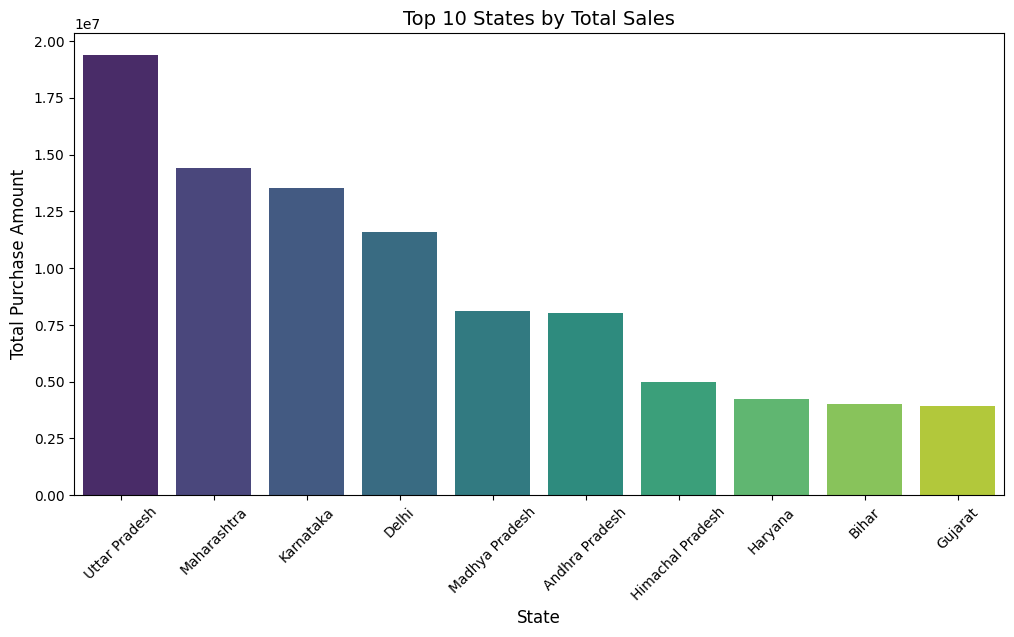

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette="viridis")

plt.title("Top 10 States by Total Sales", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Purchase Amount", fontsize=12)
plt.xticks(rotation=45)
plt.show()

-Occupation VS Purchase

In [ ]:
df["Occupation"].value_counts()

,count
Occupation,
IT Sector,1583
Healthcare,1408
Aviation,1310
Banking,1137
Govt,854
Hospitality,703
Media,637
Automobile,565
Chemical,541


In [ ]:
occ_sales = df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

print(occ_sales)

         Occupation    Amount
10        IT Sector  14755079
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10770610
7              Govt   8517212
9       Hospitality   6376405
12            Media   6295832
1        Automobile   5368596
4          Chemical   5297436
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3204972
0       Agriculture   2593087


-Product Category Populatority


In [ ]:
df["Product_Category"].value_counts()

,count
Product_Category,
Clothing & Apparel,2655
Food,2490
Electronics & Gadgets,2087
Footwear & Shoes,1059
Household items,520
Beauty,422
Games & Toys,386
Sports Products,356
Furniture,352


In [ ]:
prod_sales = df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

print(prod_sales)

         Product_Category    Amount
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051
11        Household items   1569337
16             Tupperware   1155642
2                   Books   1061478
4                   Decor    730360
13               Pet Care    482277
10     Hand & Power Tools    405618
17             Veterinary    112702
12                 Office     81936


- Marital status vs purchase

In [ ]:
df["Marital_Status"].value_counts()

,count
Marital_Status,
Unmarried,5656
Married,5583


In [ ]:
prod_sales = df.groupby('Marital_Status')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

print(prod_sales)

  Marital_Status    Amount
0        Married  53243221
1      Unmarried  53005908


- Top 10 cities by sales

In [ ]:
df["Cities"].value_counts()

,count
Cities,
Ahmedabad,1208
Delhi,1138
Mumbai,1134
Bangalore,1125
Chennai,1124
Kolkata,1123
Jaipur,1112
Lucknow,1109
Pune,1095


In [ ]:
prod_sales = df.groupby('Cities')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

print(prod_sales)

      Cities    Amount
0  Ahmedabad  11526367
2    Chennai  10994949
3      Delhi  10965116
8     Mumbai  10639214
6    Kolkata  10520671
1  Bangalore  10519069
9       Pune  10503120
7    Lucknow  10281792
5     Jaipur  10270784
4  Hyderabad  10028047


- Purchase amount distribution (histogram)


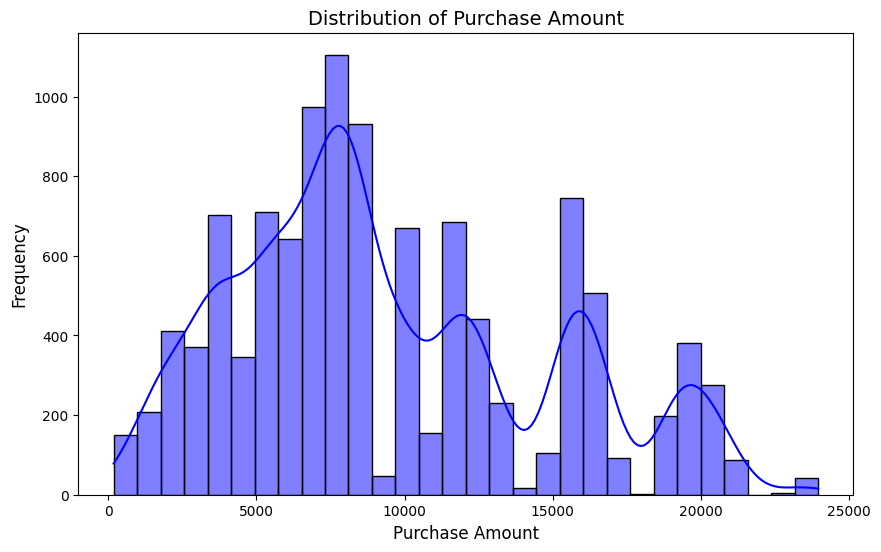

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=30, kde=True, color='blue')

plt.title("Distribution of Purchase Amount", fontsize=14)
plt.xlabel("Purchase Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

- Boxplot: Purchase by gender

/tmp/ipython-input-3129439242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Amount', data=df, palette='pastel')


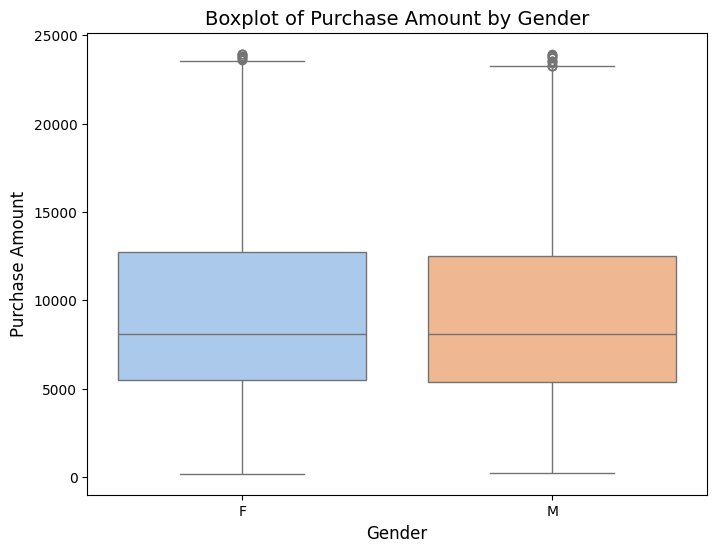

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Amount', data=df, palette='pastel')

plt.title("Boxplot of Purchase Amount by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Purchase Amount", fontsize=12)
plt.show()

Top 10 Most Purchased Products [Bar Plot]

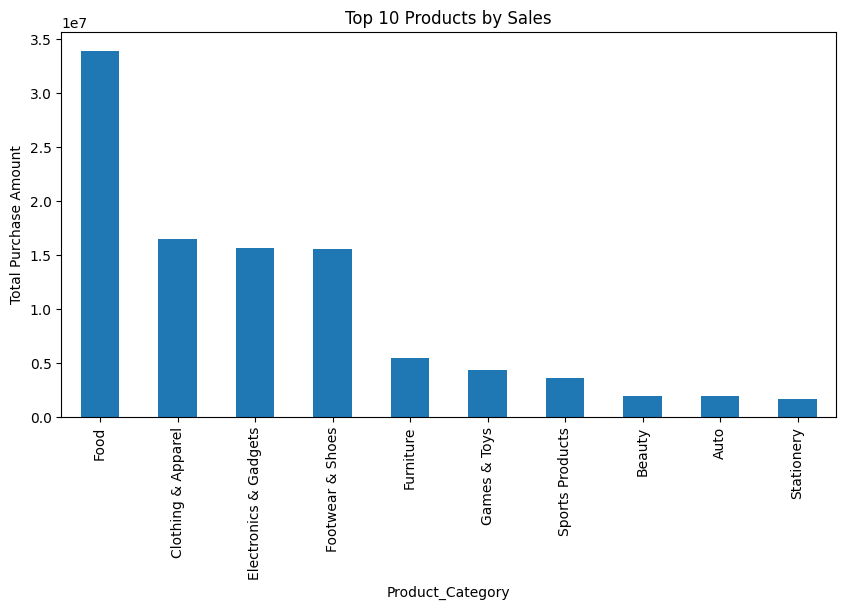

In [ ]:
top_products = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Products by Sales")
plt.ylabel("Total Purchase Amount")
plt.show()

Age Group vs Product Category [Bar Plot]

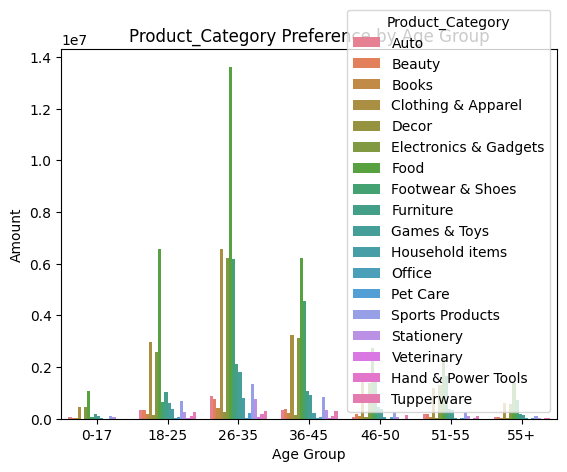

In [ ]:
age_category = df.groupby(['Age Group','Product_Category'])['Amount'].sum().reset_index()
sns.barplot(x='Age Group', y='Amount', hue='Product_Category', data=age_category)
plt.title("Product_Category Preference by Age Group")
plt.show()

END